In [440]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV ##Recursive feature elimination with cross-validation to select features.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [441]:
data = pd.read_csv("day.csv")

In [442]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [443]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [444]:
data.shape

(730, 16)

## **Check Null Values**

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [446]:
## We don't have null values in any of the columns
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [447]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


## **Create box plot to detect outliers**

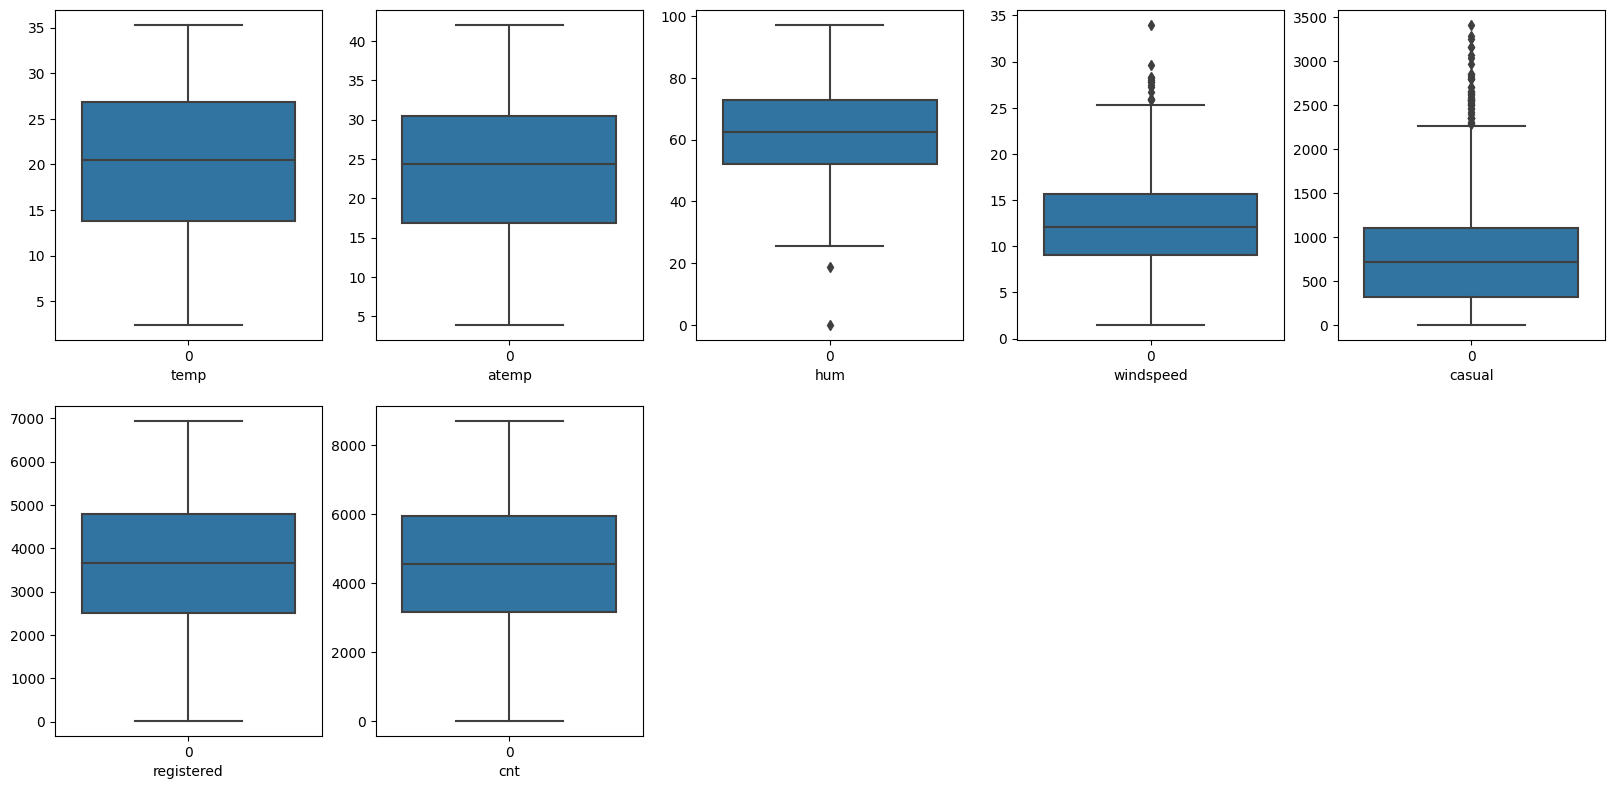

In [448]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
continous_variable = ['temp','atemp','hum','windspeed','casual'	,'registered','cnt']
for column in continous_variable:
    if plotnumber<=29 :
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [449]:
## Since we found outliers present in hum, windspeed and casual column, fix these columns

In [450]:
## remove the outliers in hum column by removing 2 rows 
data = data[data['hum'] > 25]

In [451]:
data = data[data['windspeed'] <= data['windspeed'].quantile(0.99)]

In [452]:
data = data[data['casual'] <= data['casual'].quantile(0.95)]

In [453]:
data.shape

(684, 16)

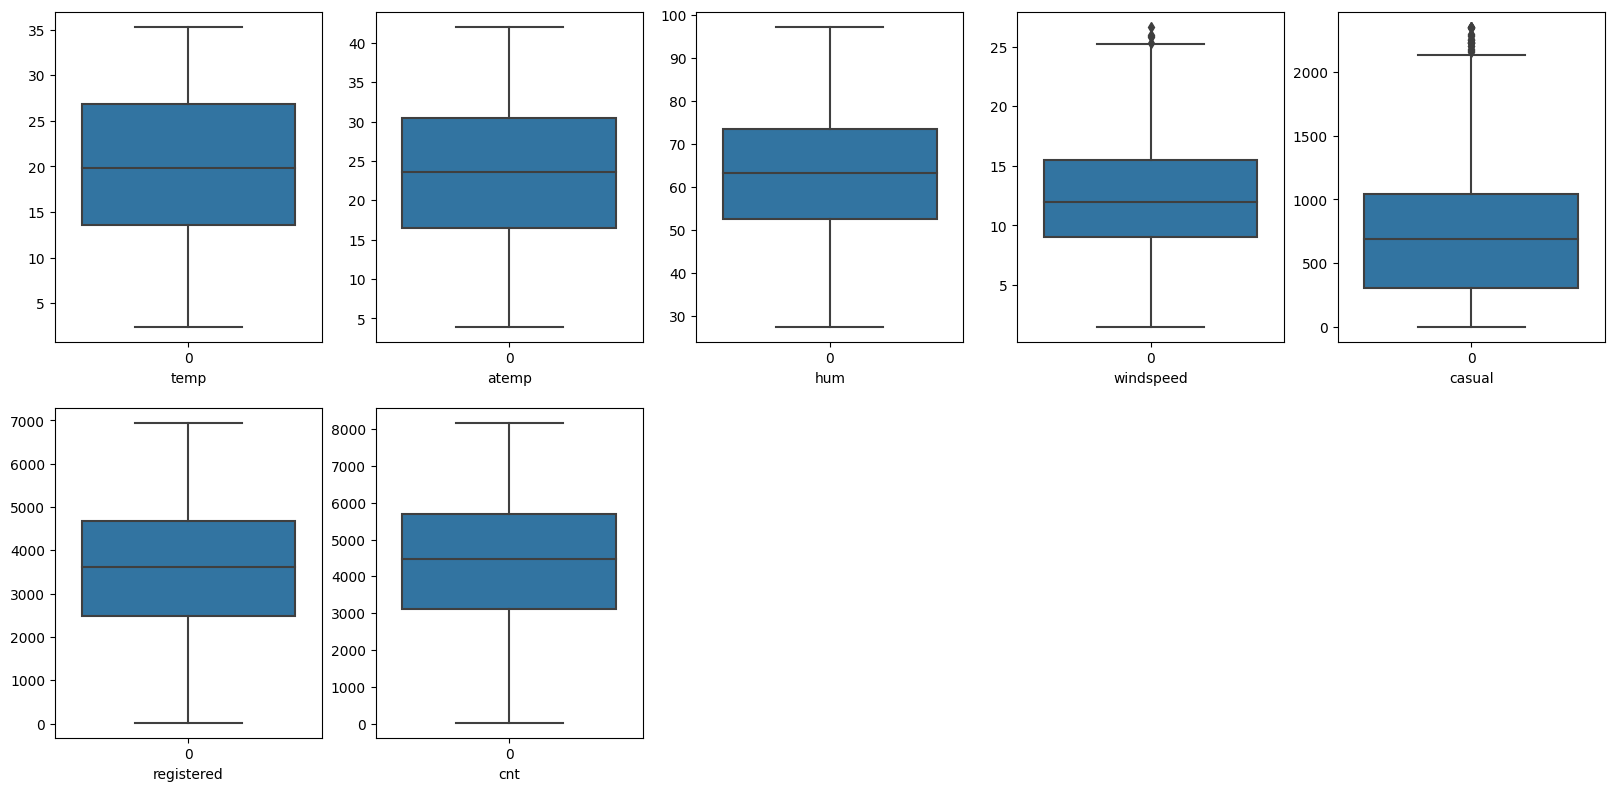

In [454]:
## Create box plot to detect outliers

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
continous_variable = ['temp','atemp','hum','windspeed','casual'	,'registered','cnt']
for column in continous_variable:
    if plotnumber<=29 :
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [455]:
data.holiday.value_counts()

0    666
1     18
Name: holiday, dtype: int64

In [456]:
## instant - remove bcoz this is just a serial number
## holiday - ## Since the data in holiday column is left skewed or very less no. of datapoints in other categpry, and -0.098 correlation with target variable - so we can drop this variable

In [457]:
data.drop('instant', axis = 1, inplace = True)
data.drop('holiday', axis = 1, inplace = True)

## **Heatmap**

<Axes: >

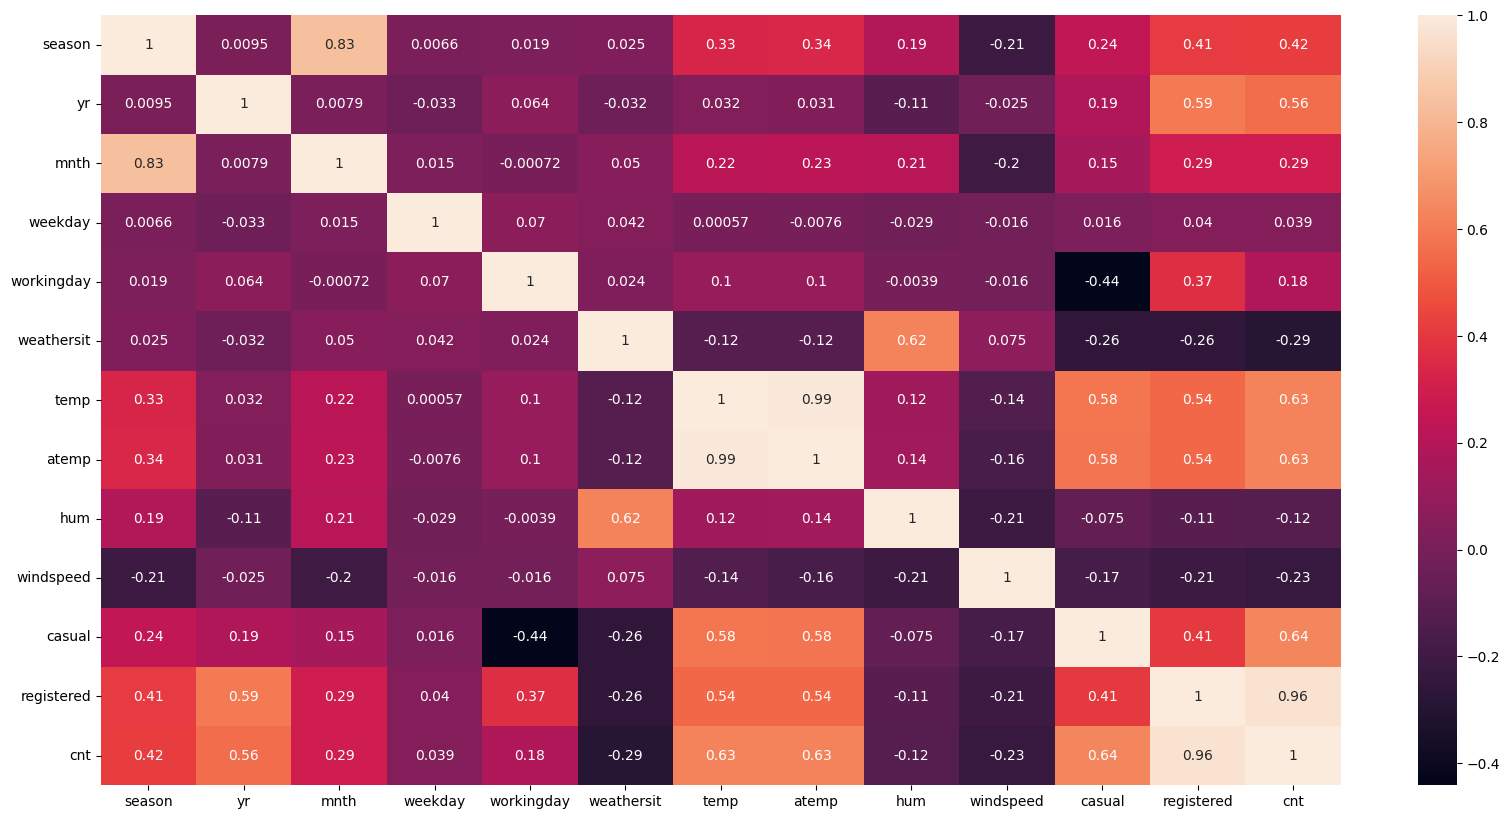

In [458]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True)

In [459]:
## Since temp and atemp is highly correlated with each other 0.99, and having equal impact on the target variable which is 0.63 
## So we can drop atemp column
data.drop('atemp', axis = 1, inplace = True)

In [460]:
data.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


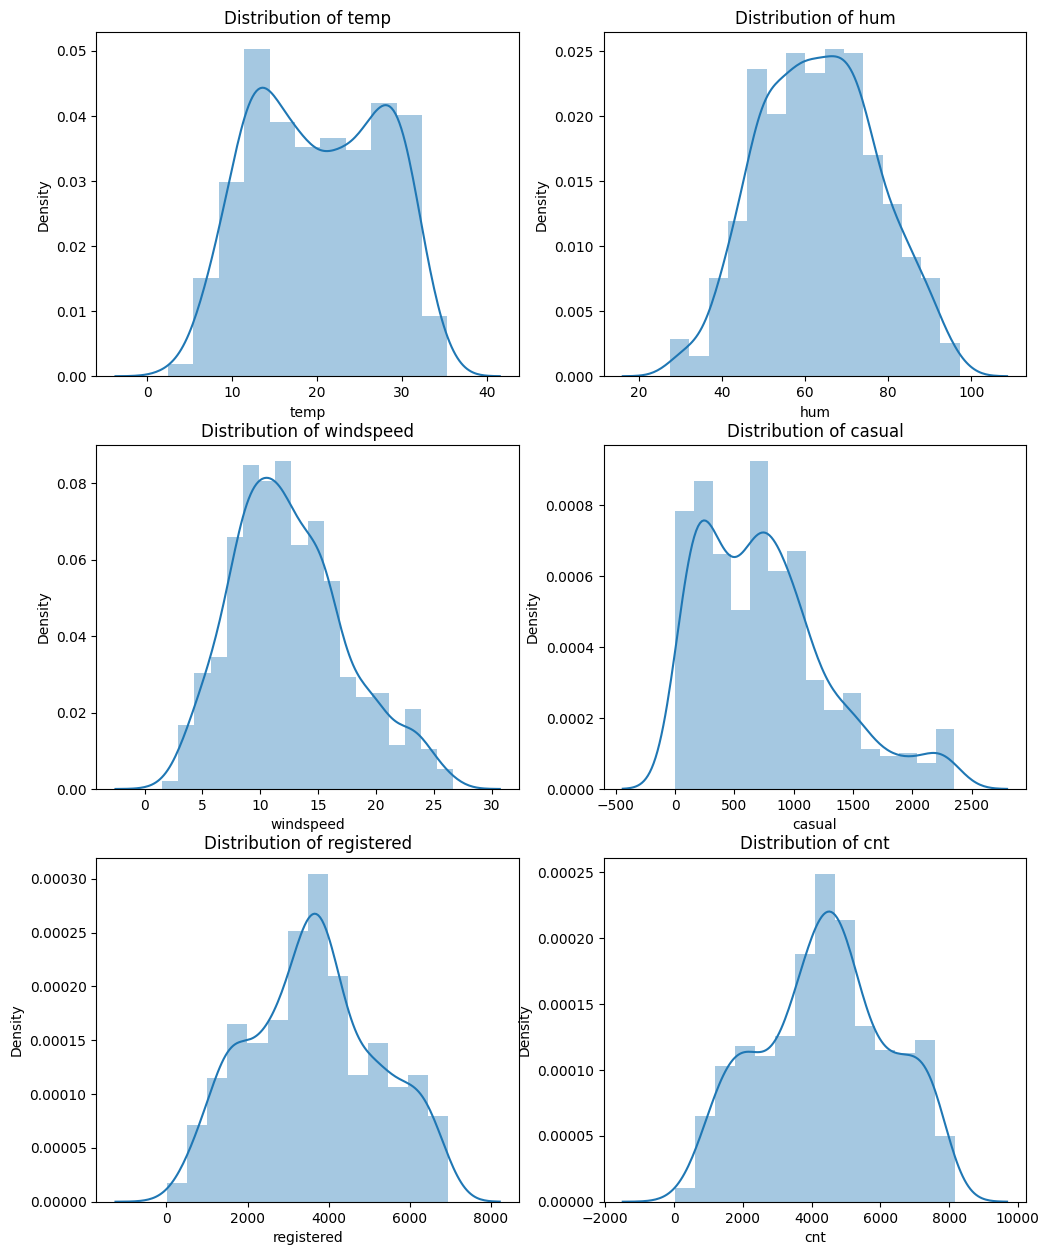

In [461]:
## Use distplot to check the distribution of the columns 

continous_variable = ['temp','hum','windspeed','casual'	,'registered','cnt']
plt.figure(figsize = (12,18))
for i, v in enumerate(continous_variable):
  plt.subplot(4,2,i+1)
  sns.distplot(data[v], kde = True)
  plt.title('Distribution of'+' ' + v)
  plt.xlabel(v)
  plt.ylabel('Density')
  plt.subplots_adjust(bottom = 0.001)
plt.show()

In [462]:
## Most of the columns is normally Distributed, hence we can the linear regression algorithm here

In [463]:
## Since we have yr, month and weekday, so we can remove the dteday column
data.drop('dteday', axis = 1, inplace = True)

In [464]:
data.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [465]:
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


## **Analysis** **on** **data**

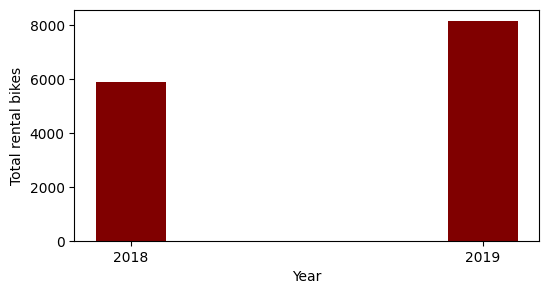

In [466]:
fig = plt.figure(figsize = (6, 3))
new = data.yr.apply(lambda x : '2018' if x == 0 else '2019')
 
# creating the bar plot
x = new
y = data.cnt
plt.bar(x, y, color ='maroon',
        width = 0.2)
 
plt.xlabel("Year")
plt.ylabel("Total rental bikes")
plt.show()

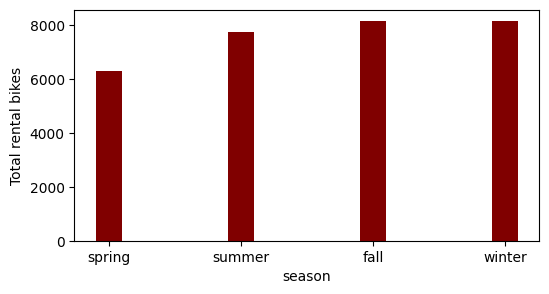

In [467]:
fig = plt.figure(figsize = (6, 3))
new = data.season.apply(lambda x : 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else "winter")
 
# creating the bar plot
x = new
y = data.cnt
plt.bar(x, y, color ='maroon',
        width = 0.2)
 
plt.xlabel("season")
plt.ylabel("Total rental bikes")
plt.show()

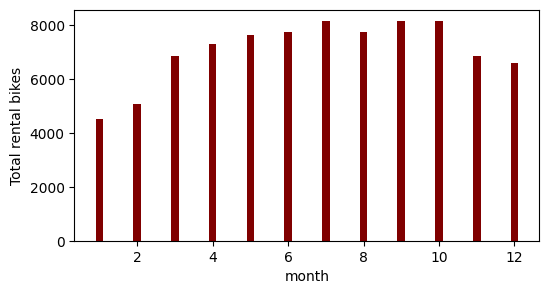

In [468]:
fig = plt.figure(figsize = (6, 3))
 
# creating the bar plot
x = data.mnth
y = data.cnt
plt.bar(x, y, color ='maroon',
        width = 0.2)
 
plt.xlabel("month")
plt.ylabel("Total rental bikes")
plt.show()

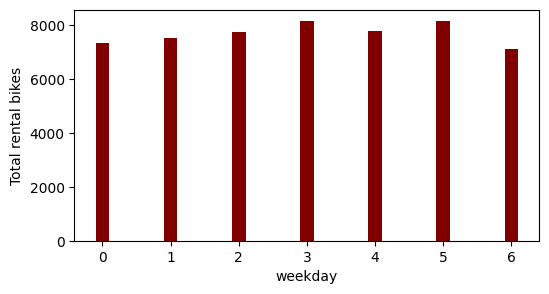

In [469]:
fig = plt.figure(figsize = (6, 3))
 
# creating the bar plot
x = data.weekday
y = data.cnt
plt.bar(x, y, color ='maroon',
        width = 0.2)
 
plt.xlabel("weekday")
plt.ylabel("Total rental bikes")
plt.show()

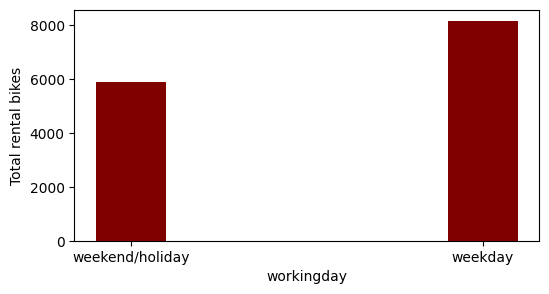

In [470]:
fig = plt.figure(figsize = (6, 3))
new = data.yr.apply(lambda x : 'weekday' if x == 1 else 'weekend/holiday')
 
# creating the bar plot
x = new
y = data.cnt
plt.bar(x, y, color ='maroon',
        width = 0.2)
 
plt.xlabel("workingday")
plt.ylabel("Total rental bikes")
plt.show()

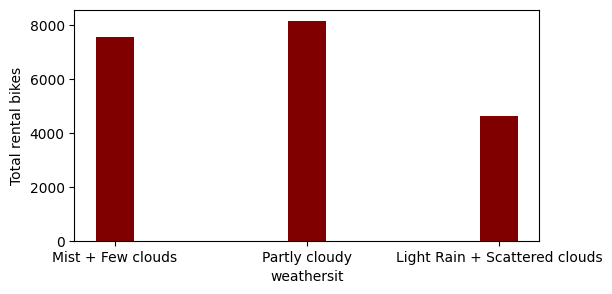

In [471]:

fig = plt.figure(figsize = (6, 3))
new = data.weathersit.apply(lambda x : 'Partly cloudy' if x == 1 else 'Mist + Few clouds' if x == 2 else 'Light Rain + Scattered clouds')
 
# creating the bar plot
x = new
y = data.cnt
plt.bar(x, y, color ='maroon',
        width = 0.2)
 
plt.xlabel("weathersit")
plt.ylabel("Total rental bikes")
plt.show()

In [472]:
## We can conclude based on above graphs

# - In 2019 the price of rental bikes is more as compare to 2018
# - In season Fall and winter has reahed maximum sales (Our demand is high in the season of Fall and Winter)
# - In the months of July, september and october reached the max sales
# - Wednesday and Friday got the maximum sales (Friday because end of the week)
# - Because of the above data weekday has more number of sales as compare to weekend/holiday.
# - People go for outing on bikes more on when the weather is mostly Partly Cloudy


# So, the business need to focus more on Weekdays (Mostly on wednesday and Friday) in the months of July, september and october then they can increase the revenue of the company.

In [473]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      684 non-null    int64  
 1   yr          684 non-null    int64  
 2   mnth        684 non-null    int64  
 3   weekday     684 non-null    int64  
 4   workingday  684 non-null    int64  
 5   weathersit  684 non-null    int64  
 6   temp        684 non-null    float64
 7   hum         684 non-null    float64
 8   windspeed   684 non-null    float64
 9   casual      684 non-null    int64  
 10  registered  684 non-null    int64  
 11  cnt         684 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 85.6 KB


In [474]:
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [475]:
## Since workingday and yr has only 0 and 1 values, hence we don't need to do one hot colding for these columns.

In [476]:
data.season.value_counts()

3    176
4    171
1    170
2    167
Name: season, dtype: int64

In [477]:
data.mnth.value_counts()

1     61
8     61
12    61
11    60
7     58
3     57
10    57
4     56
5     55
6     53
9     53
2     52
Name: mnth, dtype: int64

In [478]:
data.weathersit.value_counts()

1    426
2    238
3     20
Name: weathersit, dtype: int64

In [479]:
## Apply one hot coding for season, mnth and weathersit columns

In [480]:
dummies = pd.get_dummies(data.season, drop_first=True)
dummies.rename(columns = {2:'summer', 3:'fall', 4:'winter'}, inplace = True)

In [481]:
mnths = pd.get_dummies(data.mnth, drop_first=True)
mnths.rename(columns = {2:'Feb', 3:'March', 4:'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9 : 'Sept', 10: 'Oct', 11 : 'Nov', 12 : 'Dec'}, inplace = True)

In [482]:
weathersits = pd.get_dummies(data.weathersit, drop_first=True)
weathersits.head()
weathersits.rename(columns = {2:'Mist', 3:'Light_Snow'}, inplace = True)

In [483]:
weekdays = pd.get_dummies(data.weekday, drop_first=True)
weekdays.rename(columns = {1: 'Wednesday', 2:'Thursday', 3:'Friday', 4:'Saturday', 5: 'Sunday', 6: 'Monday'}, inplace = True)

In [484]:
data = pd.concat([data, dummies, mnths, weathersits, weekdays], axis=1)

In [485]:
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,summer,fall,winter,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Mist,Light_Snow,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,331,654,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,131,670,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [486]:
## Remove some column
columns = ['season', 'mnth', 'weathersit', 'weekday']
data.drop(columns, axis = 1, inplace = True)

In [487]:
data.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'summer', 'fall', 'winter', 'Feb', 'March', 'April', 'May',
       'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Mist',
       'Light_Snow', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'],
      dtype='object')

In [488]:
data = data[['yr', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'summer', 'fall', 'winter', 'Feb', 'March',
       'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec',
       'Mist', 'Light_Snow', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'cnt']]

<Axes: >

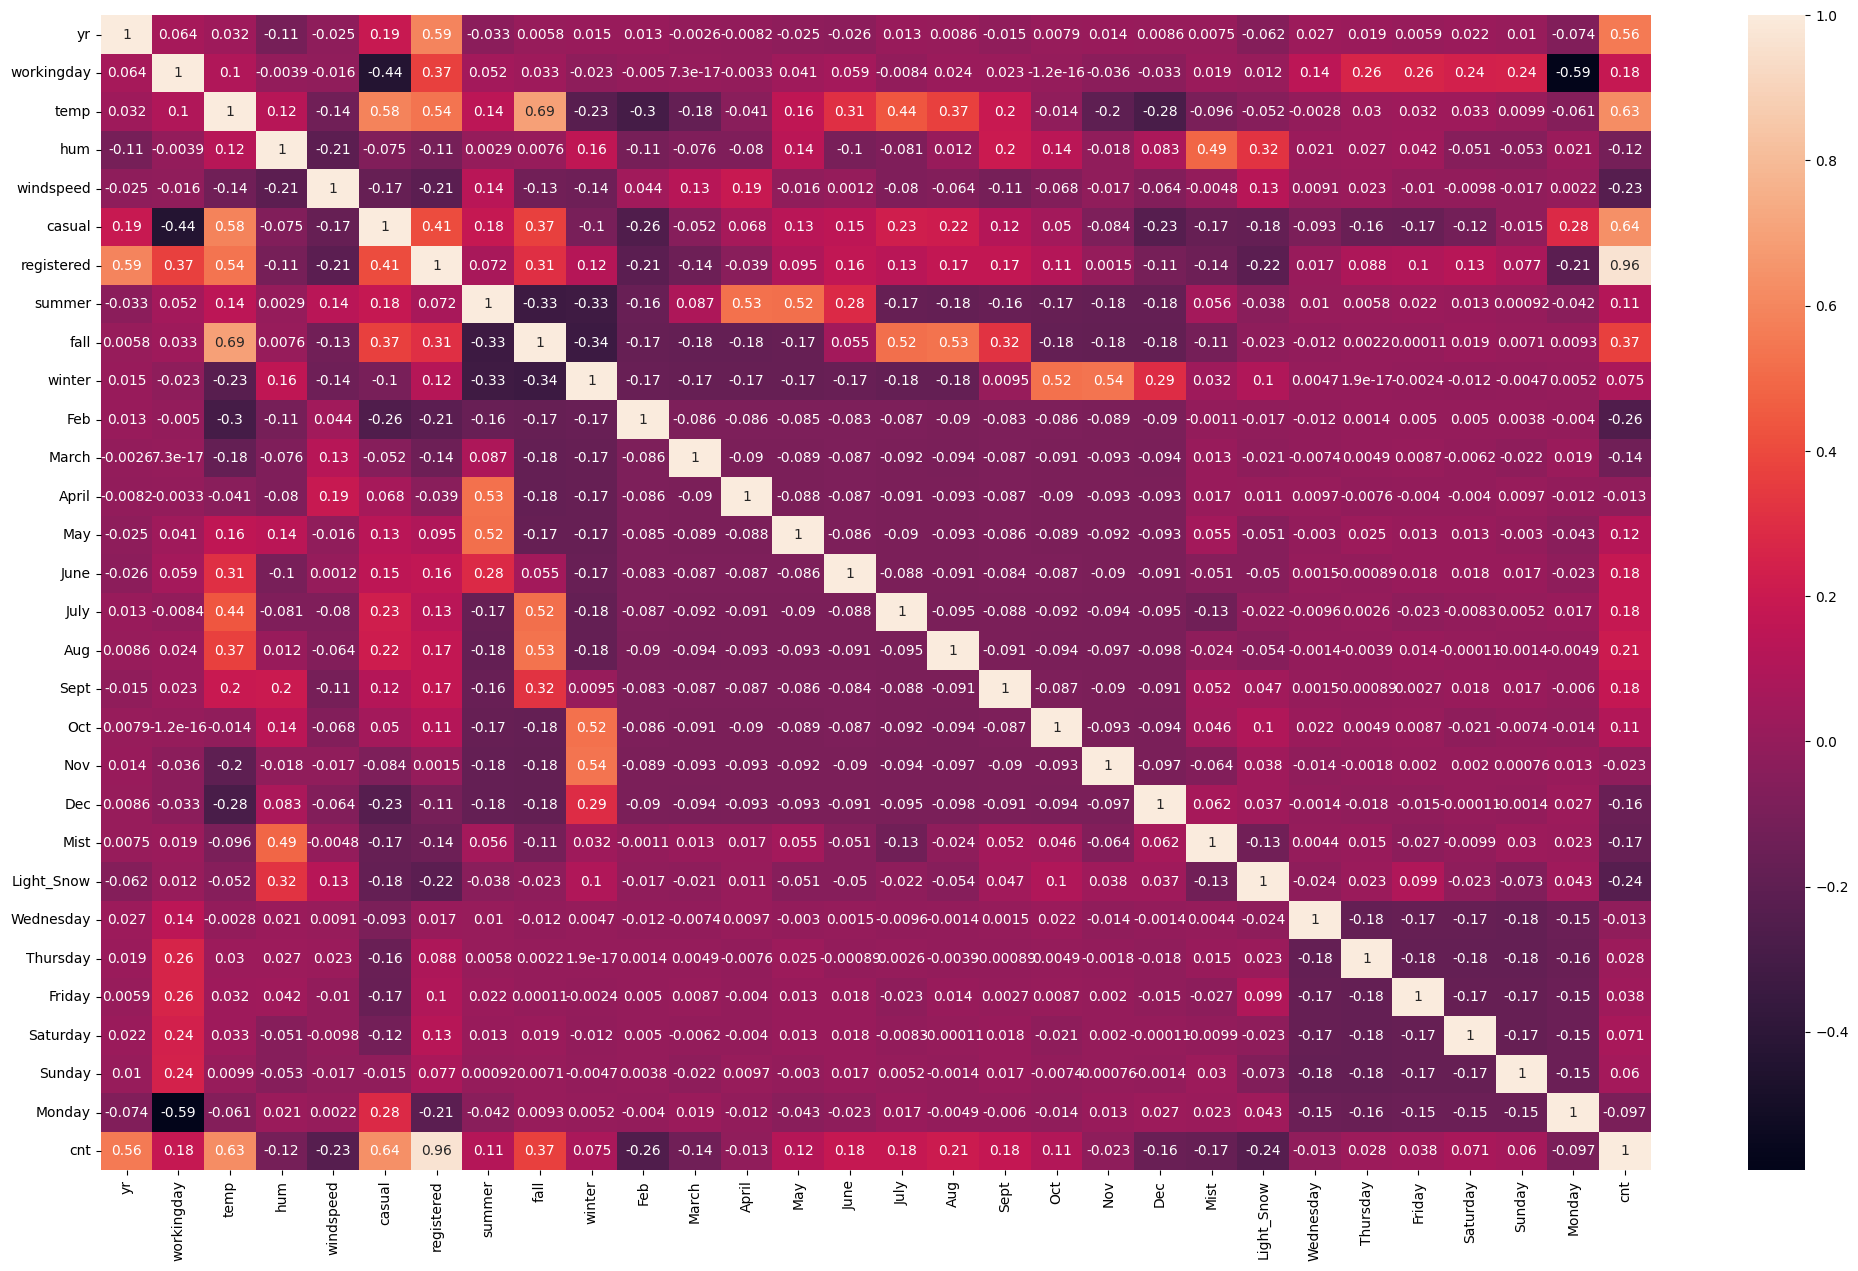

In [489]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot = True)

In [490]:
## Since casual and registered is the subset of the cnt columns that's why we need to drop those columne
col = ['casual', 'registered']
data.drop(col, axis = 1, inplace = True)

In [491]:
## Now we are good to create the linear regression model

In [492]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,684.0,0.478070,0.499884,0.000000,0.000000,0.000000,1.000000,1.000000
workingday,684.0,0.719298,0.449671,0.000000,0.000000,1.000000,1.000000,1.000000
temp,684.0,20.131430,7.576211,2.424346,13.555615,19.850847,26.855000,35.328347
hum,684.0,63.284714,13.983737,27.583300,52.505850,63.166700,73.385425,97.250000
windspeed,684.0,12.587979,4.939538,1.500244,9.000445,11.958797,15.521505,26.666536
summer,684.0,0.244152,0.429898,0.000000,0.000000,0.000000,0.000000,1.000000
fall,684.0,0.257310,0.437472,0.000000,0.000000,0.000000,1.000000,1.000000
winter,684.0,0.250000,0.433330,0.000000,0.000000,0.000000,0.250000,1.000000
Feb,684.0,0.076023,0.265229,0.000000,0.000000,0.000000,0.000000,1.000000
March,684.0,0.083333,0.276588,0.000000,0.000000,0.000000,0.000000,1.000000


In [493]:
# Rescaling the Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [494]:
data.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec', 'Mist', 'Light_Snow', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday', 'cnt'],
      dtype='object')

In [495]:
data.head()

,yr,workingday,temp,hum,windspeed,summer,fall,winter,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Mist,Light_Snow,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,cnt
0,0,0,14.110847,80.5833,10.749882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,985
1,0,0,14.902598,69.6087,16.652113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,801
2,0,1,8.050924,43.7273,16.636703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1349
3,0,1,8.200000,59.0435,10.739832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1562
4,0,1,9.305237,43.6957,12.522300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1600


In [496]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
data[num_vars] = scaler.fit_transform(data[num_vars])

In [497]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,684.0,0.478070,0.499884,0.0,0.000000,0.000000,1.000000,1.0
workingday,684.0,0.719298,0.449671,0.0,0.000000,1.000000,1.000000,1.0
temp,684.0,0.538144,0.230252,0.0,0.338295,0.529616,0.742483,1.0
hum,684.0,0.512460,0.200723,0.0,0.357740,0.510766,0.657446,1.0
windspeed,684.0,0.440579,0.196276,0.0,0.298026,0.415578,0.557144,1.0
summer,684.0,0.244152,0.429898,0.0,0.000000,0.000000,0.000000,1.0
fall,684.0,0.257310,0.437472,0.0,0.000000,0.000000,1.000000,1.0
winter,684.0,0.250000,0.433330,0.0,0.000000,0.000000,0.250000,1.0
Feb,684.0,0.076023,0.265229,0.0,0.000000,0.000000,0.000000,1.0
March,684.0,0.083333,0.276588,0.0,0.000000,0.000000,0.000000,1.0


<Axes: >

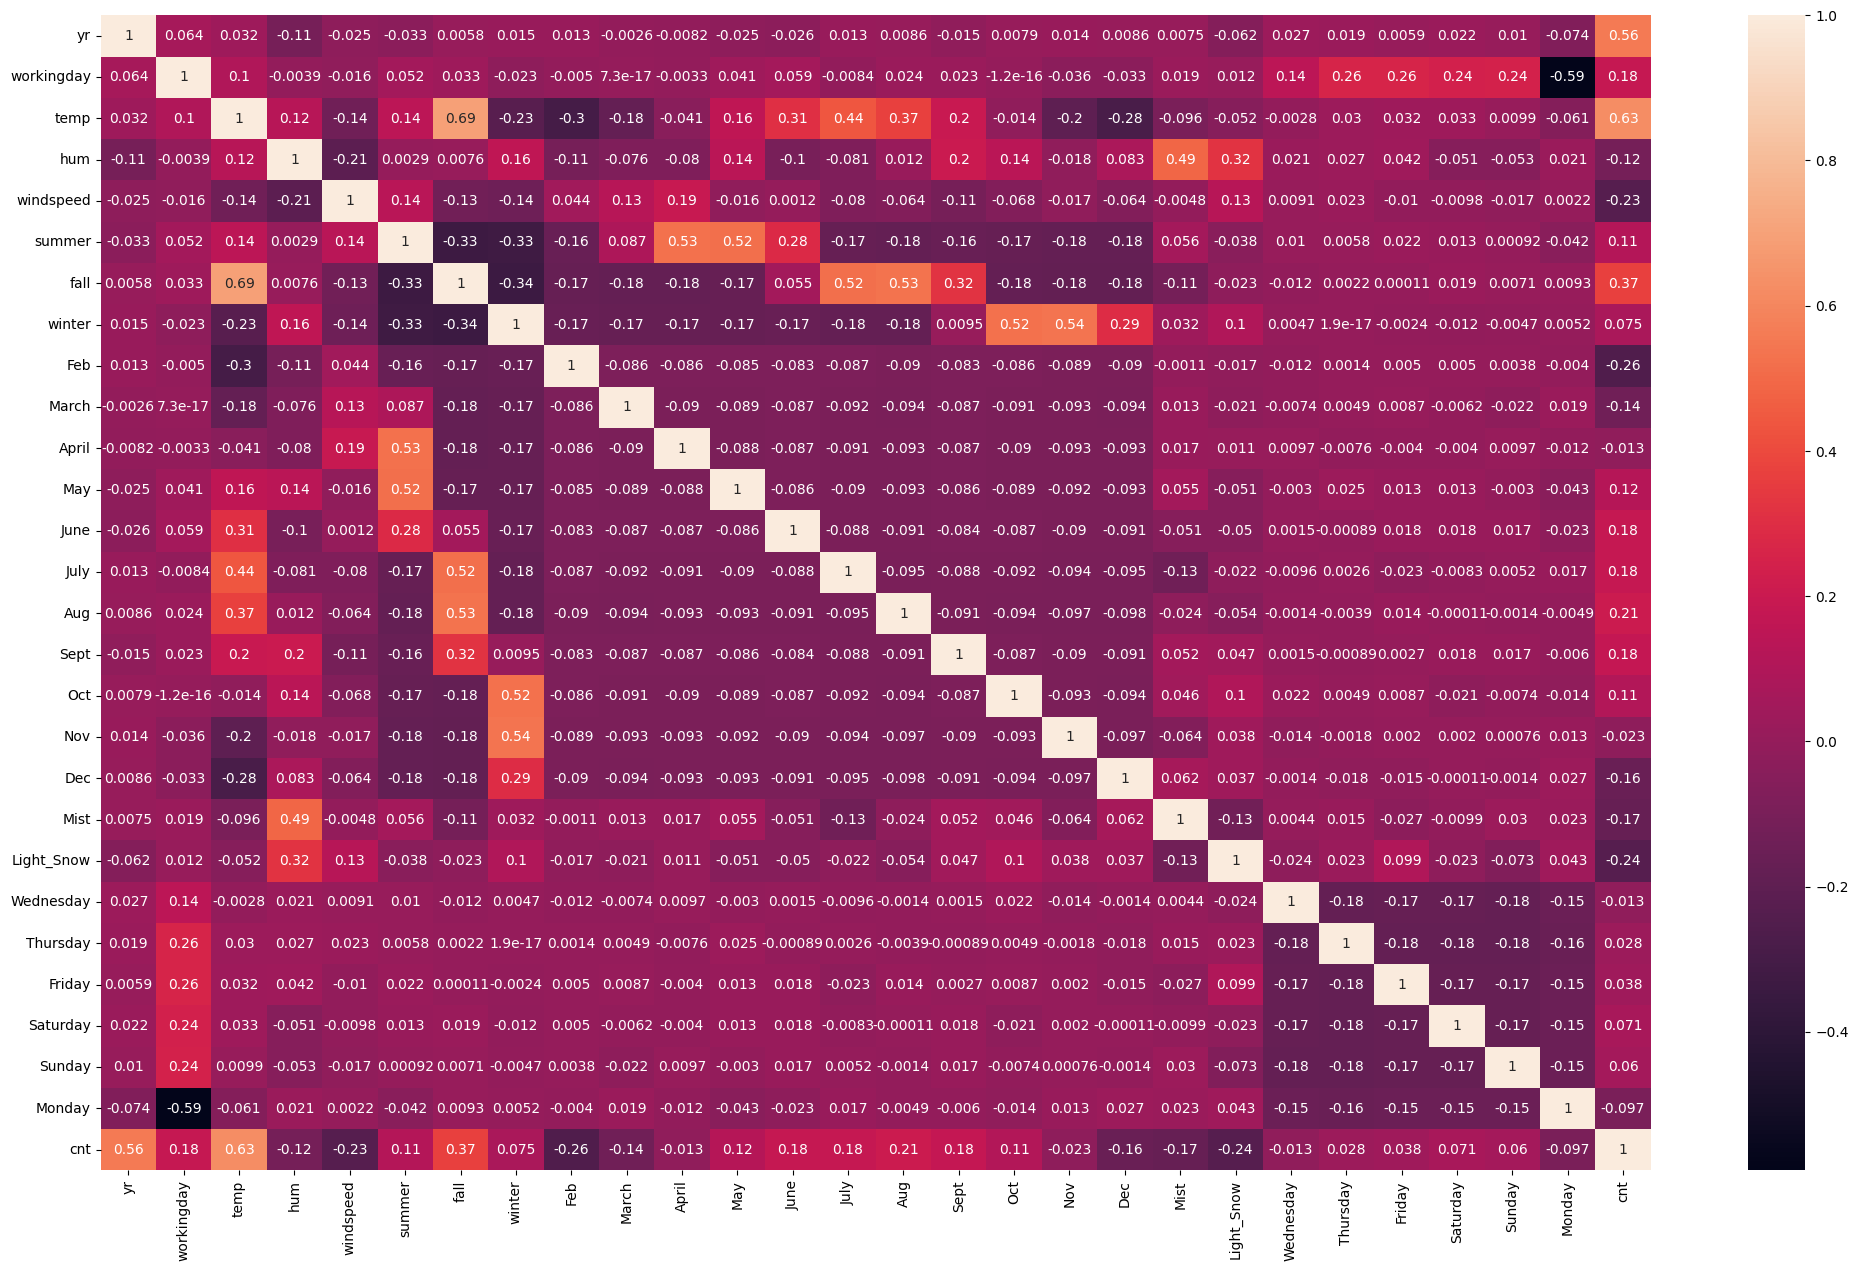

In [498]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot = True)

In [499]:
## Train Test Split

In [500]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [501]:
df_train.shape

(478, 28)

In [502]:
df_test.shape

(206, 28)

In [503]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [504]:
X_train.shape, y_train.shape

((478, 27), (478,))

In [505]:
# df_test

In [506]:
y_test = df_test.pop('cnt')
X_test = df_test

In [507]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()

# Fit the model on the train set
model.fit(X_train, y_train)


LinearRegression()

In [508]:
# Predict the target values on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.00845379518719551


In [509]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8200799784046695

In [510]:
## Using stats models

In [511]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [512]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          3.31e-173
Time:                        13:04:19   Log-Likelihood:                 488.75
No. Observations:                 478   AIC:                            -921.5
Df Residuals:                     450   BIC:                            -804.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1803      0.026      6.964      0.0

In [513]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [514]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [515]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 8),
 ('winter', True, 1),
 ('Feb', False, 12),
 ('March', False, 6),
 ('April', False, 5),
 ('May', False, 4),
 ('June', False, 7),
 ('July', False, 14),
 ('Aug', False, 3),
 ('Sept', True, 1),
 ('Oct', False, 9),
 ('Nov', False, 13),
 ('Dec', False, 15),
 ('Mist', False, 10),
 ('Light_Snow', True, 1),
 ('Wednesday', True, 1),
 ('Thursday', True, 1),
 ('Friday', True, 1),
 ('Saturday', False, 2),
 ('Sunday', True, 1),
 ('Monday', False, 11)]

In [516]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'Sept', 'Light_Snow', 'Wednesday', 'Thursday', 'Friday', 'Sunday'],
      dtype='object')

In [517]:
## As we have high p value, remove one coln one by one and check high accuracy

In [518]:
# remove months
# col = ['July', 'Dec', 'Nov','Feb', 'June', 'April', 'May', 'March']
col = ['Dec', 'July', 'Nov', 'Feb', 'Monday']
data.drop(col, axis = 1, inplace = True)

In [519]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [520]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [521]:
y_test = df_test.pop('cnt')
X_test = df_test

In [522]:
# using stats models

In [523]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [524]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          5.97e-177
Time:                        13:04:19   Log-Likelihood:                 485.23
No. Observations:                 478   AIC:                            -924.5
Df Residuals:                     455   BIC:                            -828.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2032      0.022      9.058      0.0

In [525]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()

# Fit the model on the train set
model.fit(X_train, y_train)

LinearRegression()

In [526]:
# Predict the target values on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.00854609652814551


In [527]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8181155519087265

In [528]:
# This is our Final model with r2 = 0.82 and mse is 0.0085